<a href="https://colab.research.google.com/github/ChiragKejriwal/AI-ML-Projects/blob/main/Project%208%20%3A%20GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading csv data into dataframe
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
 1. Positive Corelation
 2. Negative Correlation

In [15]:
gold_data=gold_data.drop('Date',axis=1)
correlation = gold_data.corr()

<Axes: >

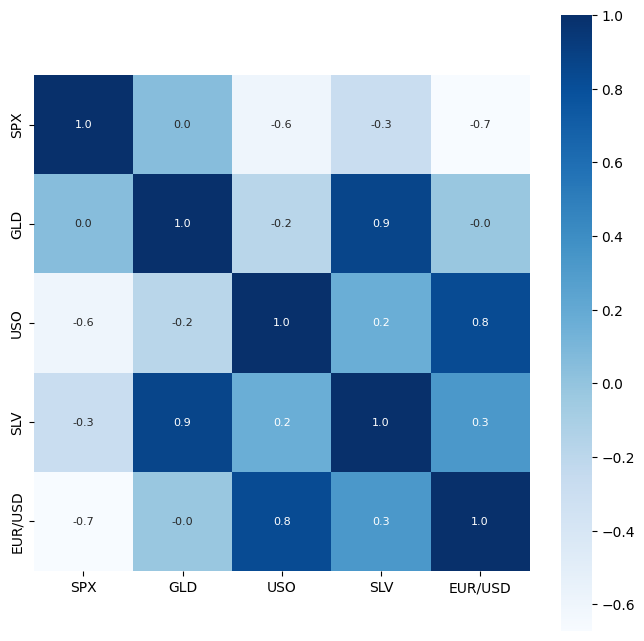

In [19]:
#construct heatmap to understand corrr
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [21]:
# corr values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


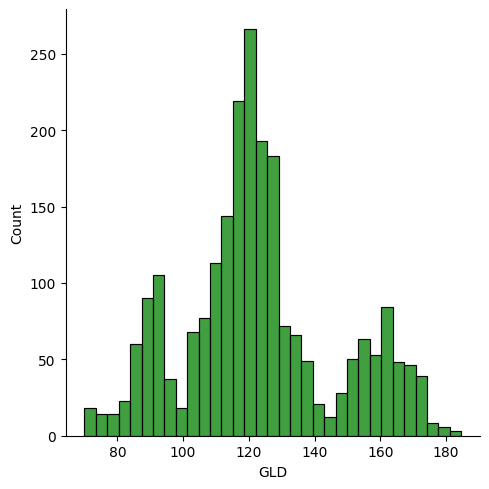

In [22]:
# checkin the distribution of gold prices
sns.displot(gold_data['GLD'],color='green')

splitting the data for test and train

In [23]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data["GLD"]

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training on random forest regressor

In [47]:
regressor=RandomForestRegressor(n_estimators=100)

In [48]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [49]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [50]:
print(test_data_prediction)
print(test_data_prediction.shape)

[168.72139939  82.11039966 115.70260011 127.55760082 120.69150104
 154.82459758 150.35019865 126.23850043 117.44479888 125.89500099
 116.57520097 172.02870087 141.67829913 167.73429938 115.24810014
 117.80670035 138.03310335 170.15040148 158.96620306 161.41469946
 155.19390036 125.03750067 176.25779992 156.92880373 125.1666005
  93.78989982  78.03640012 120.7433001  119.18019963 167.55440016
  88.3825003  125.3060002   91.208401   117.75410018 121.18649955
 136.44850119 115.47680118 115.63750059 146.74369964 107.35380091
 104.29270267  87.25189797 126.5285005  117.88580055 155.62539934
 119.68439996 108.35250012 108.12519825  93.33650099 127.05699802
  74.55900042 113.78079918 121.31700014 111.26949921 118.95409874
 120.6919996  159.28689938 166.93930159 146.89309707  85.93019852
  94.18900038  86.84929856  90.49020004 118.98410062 126.4907007
 127.3797     170.92530048 122.33659922 117.40569868  98.43439998
 168.35230047 142.81359869 131.55340246 121.19500245 121.1714992
 119.68010058

In [51]:
# R sqaured error
error=metrics.r2_score(Y_test,test_data_prediction)
print(error)

0.9899738732606982


Compare the actual values and predicted value

In [52]:
Y_test=list(Y_test)

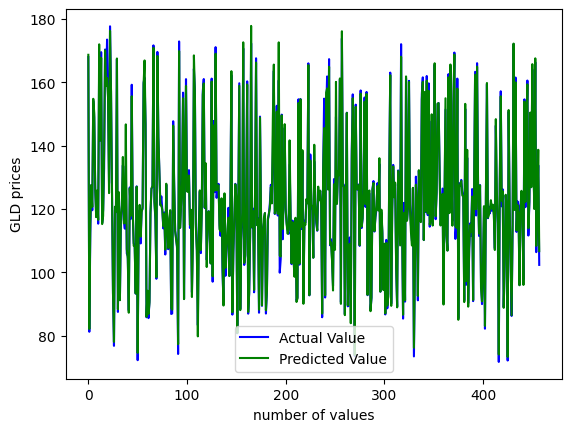

In [53]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.xlabel('number of values')
plt.ylabel('GLD prices')
plt.legend()
plt.show()